In [4]:
import os
os.listdir()



['.anaconda',
 '.conda',
 '.continuum',
 '.dotnet',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.VirtualBox',
 'anaconda3',
 'anaconda_projects',
 'AppData',
 'Application Data',
 'bank.csv',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'Favorites',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'Mall_Customers.csv',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{cb726492-93b0-11f0-b7f3-f4ee08c2afd8}.TM.blf',
 'NTUSER.DAT{cb726492-93b0-11f0-b7f3-f4ee08c2afd8}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{cb726492-93b0-11f0-b7f3-f4ee08c2afd8}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'Pictures',
 'PrintHood',
 'Recent',
 'Saved Games',
 'Searches',
 'SendTo',
 'source',
 'Start Menu',
 'Task2_Customer_Segmentation.ipynb',
 'Templates',
 'Untitled.ipynb',
 'Videos',
 'VirtualBox VMs']

In [5]:
df = pd.read_csv("bank.csv", sep=';')
df.head()



,"age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit"
0,"59,admin.,married,secondary,no,2343,yes,no,unk..."
1,"56,admin.,married,secondary,no,45,no,no,unknow..."
2,"41,technician,married,secondary,no,1270,yes,no..."
3,"55,services,married,secondary,no,2476,yes,no,u..."
4,"54,admin.,married,tertiary,no,184,no,no,unknow..."


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()


,"age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit"
0,10209
1,9689
2,6436
3,9629
4,9307


In [8]:
df.columns



Index(['age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit'], dtype='object')

In [9]:
df = pd.read_csv("bank.csv", sep=',')
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [10]:
df.columns


Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('deposit', axis=1)
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((8929, 16), (2233, 16))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression F1 Score: 0.7703281027104137
Confusion Matrix (LR):
 [[940 226]
 [257 810]]


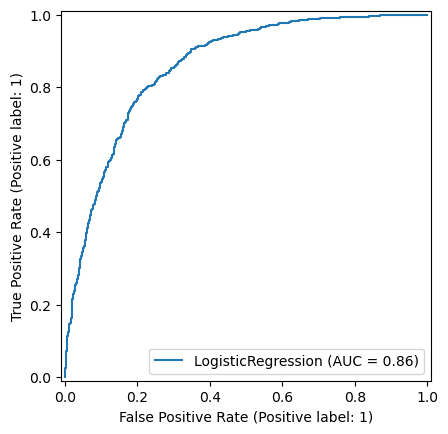

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, RocCurveDisplay
import matplotlib.pyplot as plt

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression F1 Score:", f1_score(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix (LR):\n", cm_lr)

RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.show()


In [14]:
from sklearn.ensemble import RandomForestClassifier
import shap

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

from sklearn.metrics import f1_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (RF):\n", cm_rf)

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][:5], X_test.iloc[:5])


ModuleNotFoundError: No module named 'shap'

Random Forest F1 Score: 0.8301369863013699
Confusion Matrix (RF):
 [[952 214]
 [158 909]]


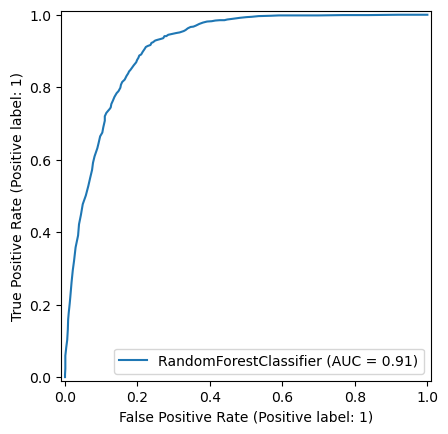

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt
import shap

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest F1 Score:", f1_score(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (RF):\n", cm_rf)

RocCurveDisplay.from_estimator(rf, X_test, y_test)
plt.show()

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][:5], X_test.iloc[:5])
